In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import joblib

from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import (confusion_matrix, 
                            ConfusionMatrixDisplay, 
                            classification_report, 
                            accuracy_score)

from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
def df_info():
    for i in df:
        print("----------------------------> ", i)
        print('Type column', df[i].dtype, ' length ', len(df[i].unique()))
        if len(df[i].unique()) < 100:
            print(df[i].unique())
            print(df[i].value_counts())
df_info()

---------------------------->  customerID
Type column object  length  7043
---------------------------->  gender
Type column object  length  2
['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
---------------------------->  SeniorCitizen
Type column int64  length  2
[0 1]
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
---------------------------->  Partner
Type column object  length  2
['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
---------------------------->  Dependents
Type column object  length  2
['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
---------------------------->  tenure
Type column int64  length  73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Analysis

* To drop: 'customerID'
* 'SeniorCitizen' is 1/0
* 'gender', 'Partner', 'PhoneService', 'Dependents', 'PaperlessBilling' are yes/no

* 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies',
         
* 'PaymentMethod', 'Contract'

* 'tenure', 'MonthlyCharges', 'TotalCharges' are numbers. 

* Check 'TotalCharges' in depth

* Target: 'Churn'

In [6]:
# TotalCharges are numbers, however is object type. Change to float
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
#df['TotalCharges'] = df['TotalCharges'].astype('float64')
# throws the error: ValueError: could not convert string to float: ''
# we have some blank spaces

In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'].isna().sum()
# replace to nan
# now we have 11 NAN
# we can transform to numbers and fill NAN values

11

In [9]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')
df['TotalCharges'] = df['TotalCharges'].replace(np.nan, df['TotalCharges'].mean())
df['TotalCharges'].isna().sum()
# convert to numeric type
# fill them with the mean
# check if NAN

0

In [10]:
for i in df:
    if df[i].isna().sum() > 0:
        print(i, df[i].isna().sum())
# if nothing shows, means no NANs

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


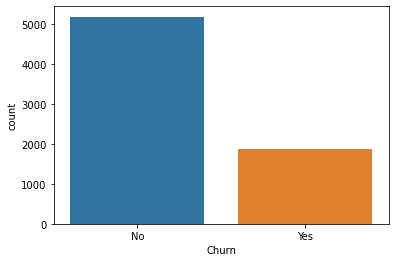

In [12]:
sns.countplot(data=df, x='Churn');
# imbalance dataset

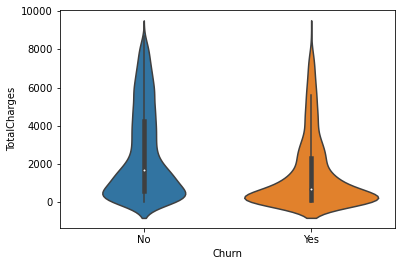

In [13]:
sns.violinplot(data=df, x="Churn", y="TotalCharges");

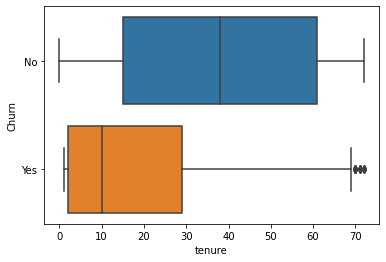

In [14]:
sns.boxplot(x='tenure', y='Churn', data=df);

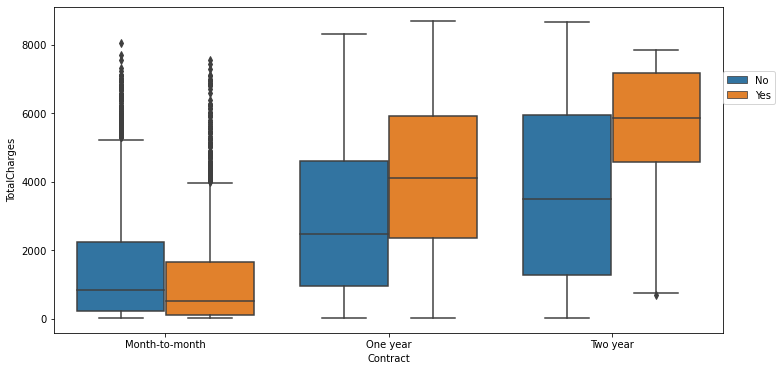

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, y='TotalCharges', x='Contract', hue='Churn');
plt.legend(loc=(1,0.7));

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
cols_to_dummies = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']
dummies = pd.get_dummies(df[cols_to_dummies])
corr = dummies.corr()
corr['Churn_Yes'].sort_values(ascending=False).iloc[1:-1] # check correlation values

Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Female                              0.008612
gender_Male                               -0.008612
PhoneService

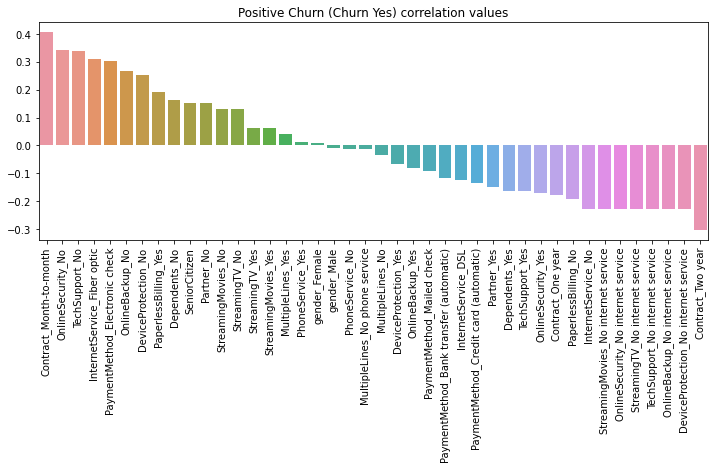

In [18]:
plt.figure(figsize=(12,4))
sns.barplot(x=corr.Churn_Yes.sort_values(ascending=False).iloc[1:-1].index,y=corr.Churn_Yes.sort_values(ascending=False).iloc[1:-1].values)
plt.title('Positive Churn (Churn Yes) correlation values')
plt.xticks(rotation=90);

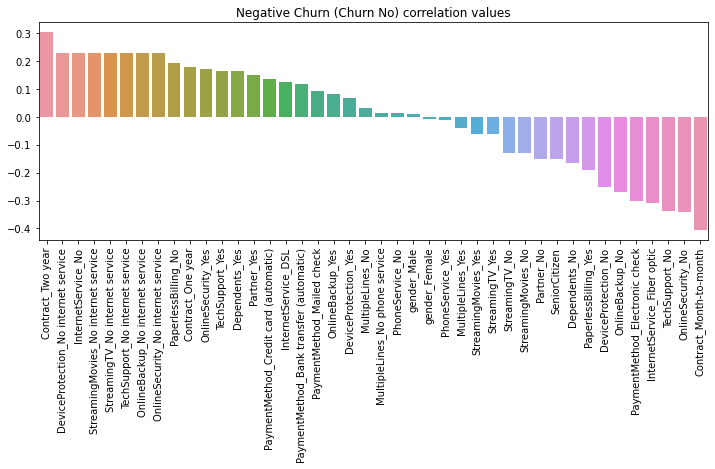

In [19]:
plt.figure(figsize=(12,4))
sns.barplot(x=corr.Churn_No.sort_values(ascending=False).iloc[1:-1].index,y=corr.Churn_No.sort_values(ascending=False).iloc[1:-1].values)
plt.title('Negative Churn (Churn No) correlation values')
plt.xticks(rotation=90);

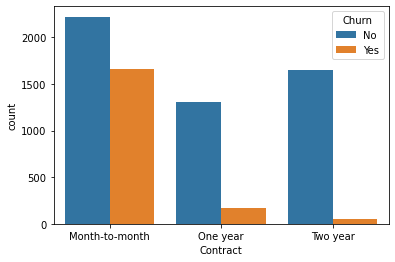

In [20]:
sns.countplot(data=df, x='Contract', hue='Churn');

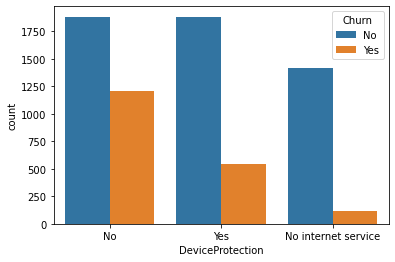

In [21]:
sns.countplot(data=df, x='DeviceProtection', hue='Churn');

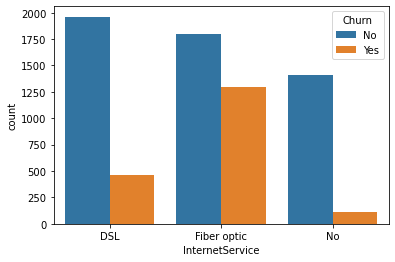

In [22]:
sns.countplot(data=df, x='InternetService', hue='Churn');

In [23]:
# create corrrelation bietween charges and churn yes

# cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
# dummies = pd.get_dummies(df['Churn'])

# corr = dummies.corr()

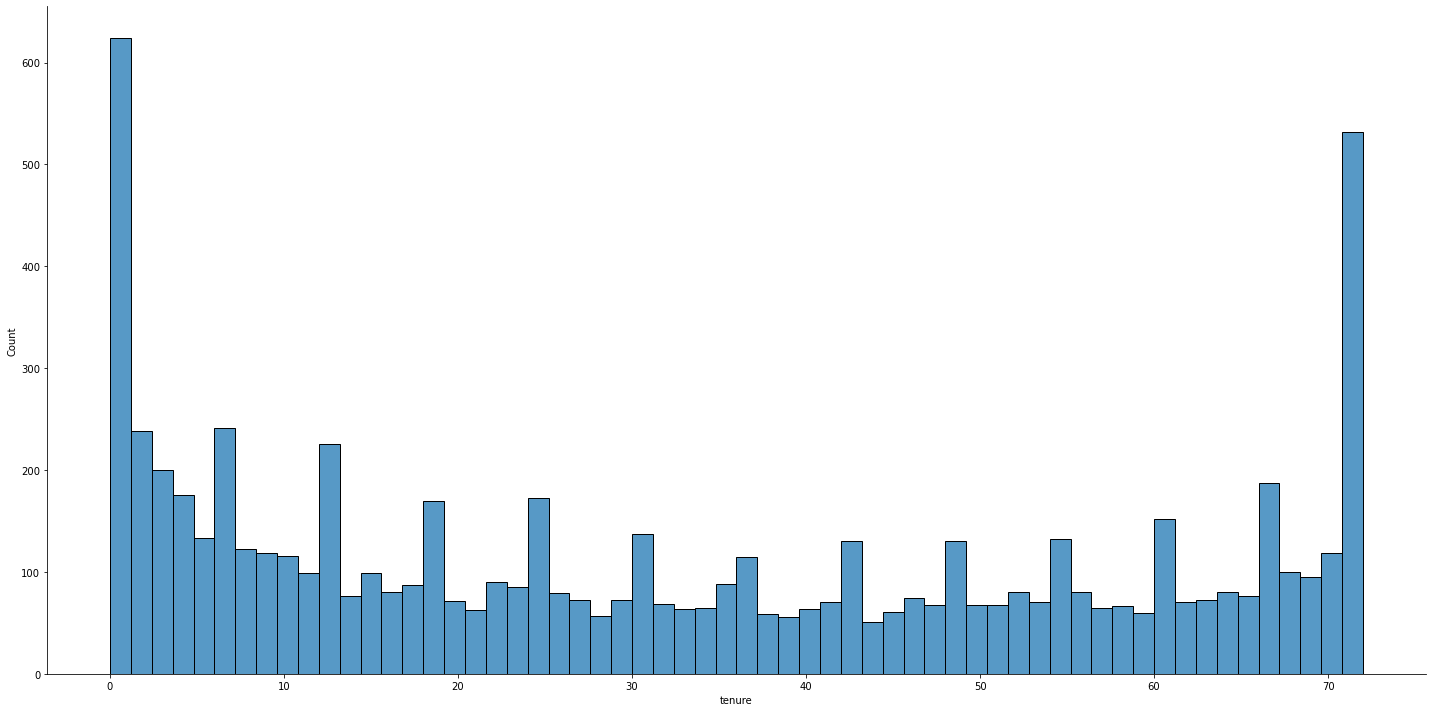

In [24]:
sns.displot(data=df, x="tenure", bins=60, height=10, aspect=2);

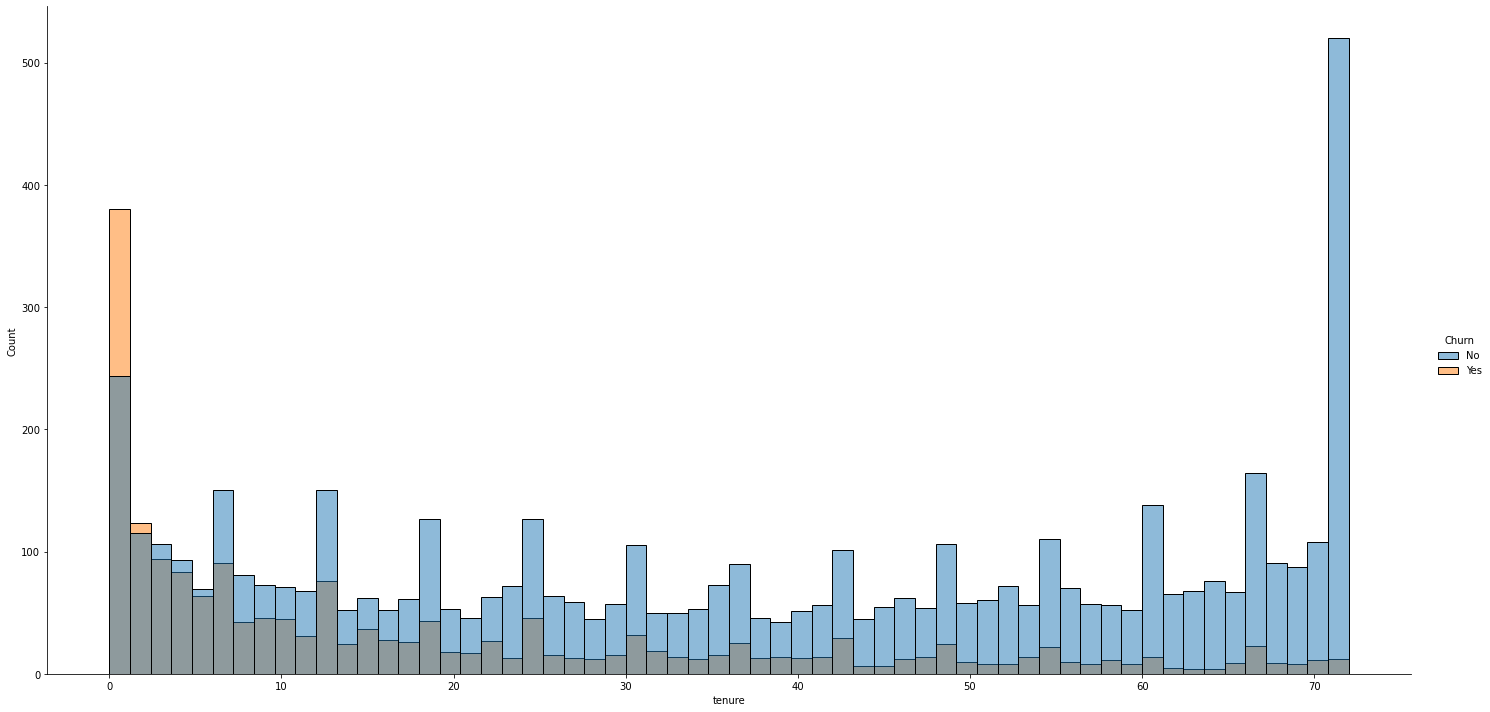

In [25]:
# first two months, churning is frequent
sns.displot(data=df, x="tenure", hue='Churn', bins=60, height=10, aspect=2);

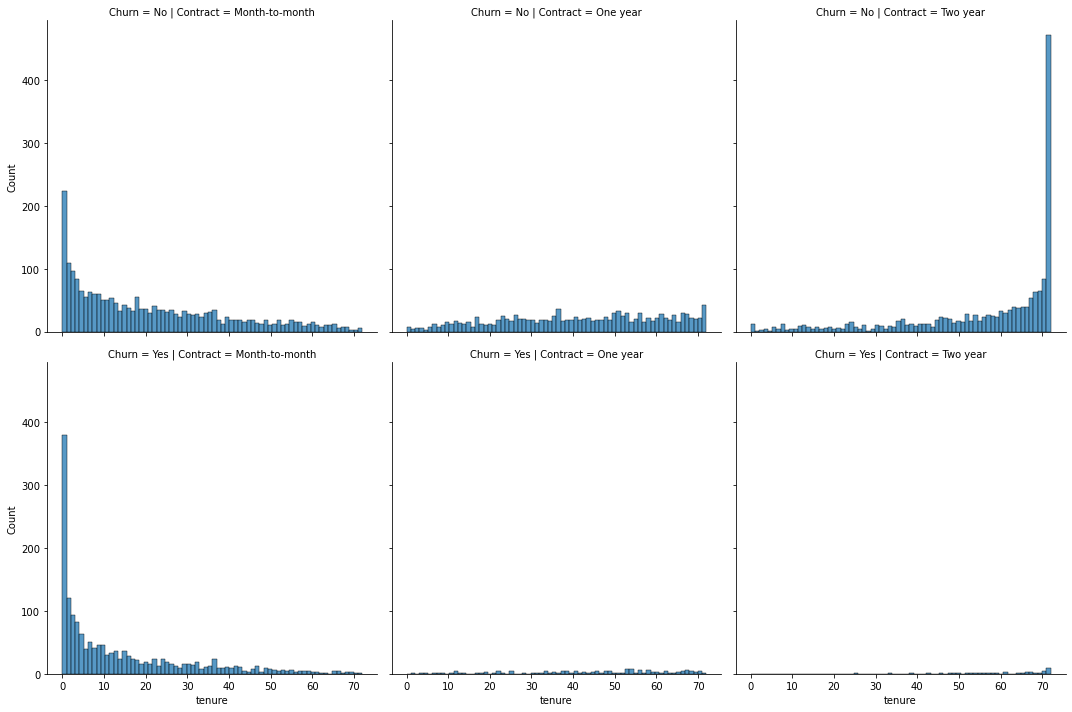

In [26]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn');

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

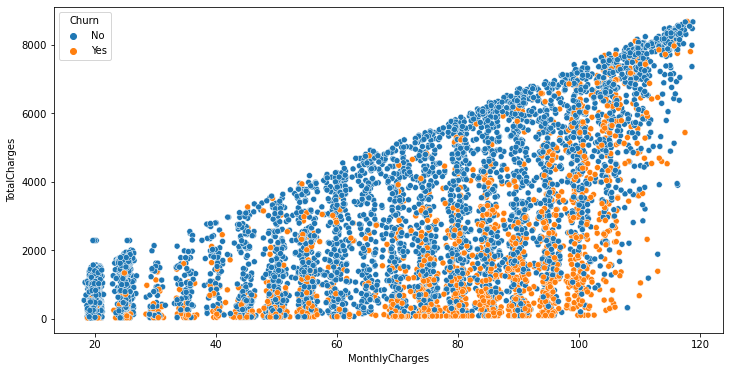

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

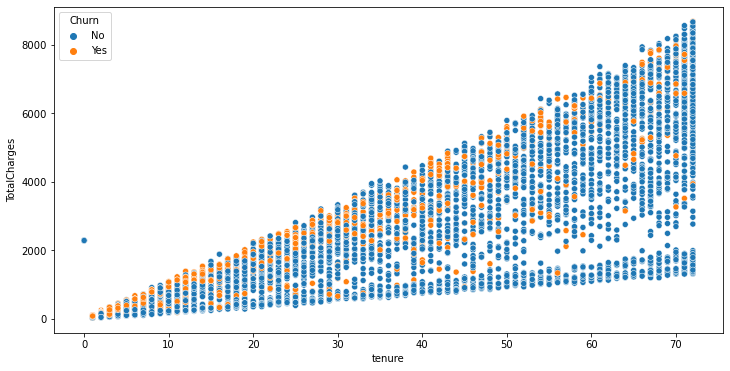

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn')

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

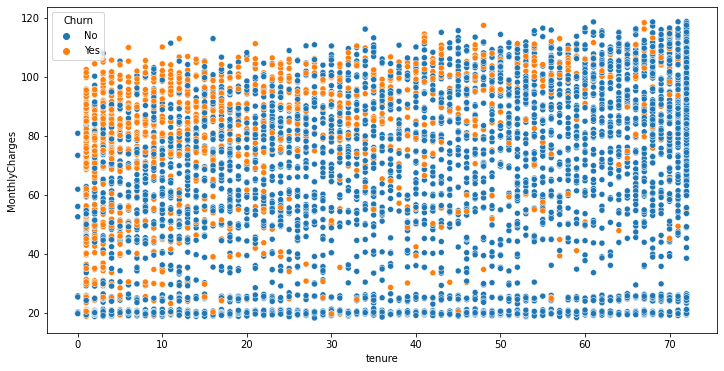

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')

In [31]:
churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [32]:
churn_no = df.groupby(['Churn', 'tenure']).count().transpose()['No']

<AxesSubplot:xlabel='tenure'>

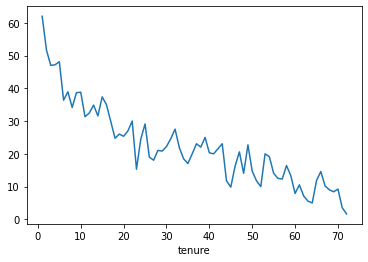

In [33]:
rate = 100*churn/(churn_no+churn)
rate.loc['customerID', :].plot()

In [34]:
def cohort(tenure):
    if tenure<13:
        return '0-12 months'
    elif tenure<25:
        return '12-24 months'
    elif tenure<49:
        return '24-48 months'
    else:
        return 'Over 48 months'

df['Tenure Cohort'] = df['tenure'].apply(cohort)

df[['Tenure Cohort', 'tenure']]

,Tenure Cohort,tenure
0,0-12 months,1
1,24-48 months,34
2,0-12 months,2
3,24-48 months,45
4,0-12 months,2
...,...,...
7038,12-24 months,24
7039,Over 48 months,72
7040,0-12 months,11
7041,0-12 months,4


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

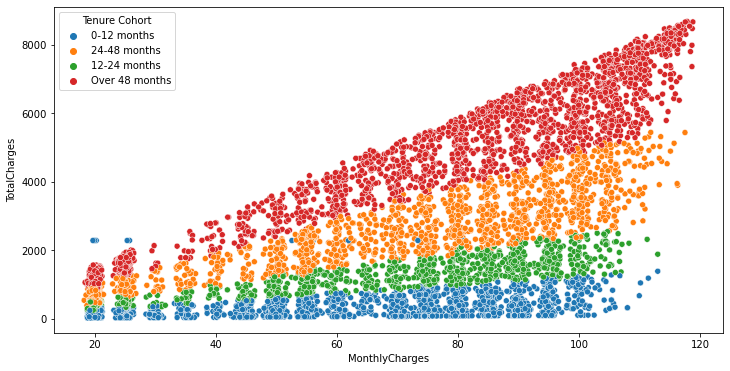

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort')

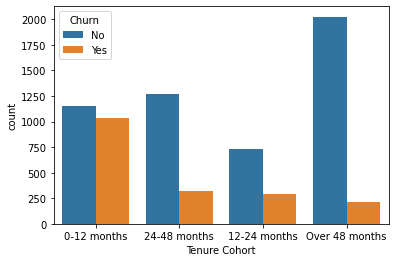

In [36]:
sns.countplot(data=df, x='Tenure Cohort', hue='Churn');

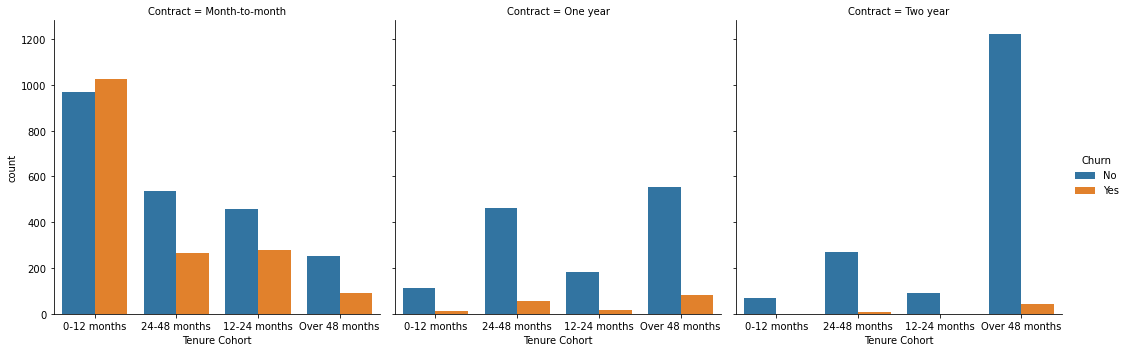

In [37]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col='Contract');

## Modeling

In [38]:
## Utility function
## train and test scores for all model classifiers
def scores(cl, X_train, y_train, X_test, y_test, train=True, cv=2): 
    """ render accuracy, classification report and confusion matrix scores for train and test
        in order to compare them
        cl: as classifier (Tree, RandomForest, etc)
        Example: scores(tree, X_train, y_train, X_test, y_test, train=False, cv=5)
    """
    if train:
        print('***************************** Training ************')
        print(f'Accuracy:\t\t {accuracy_score(y_train, cl.predict(X_train))}')
        print(f'Classification Report:\n {classification_report(y_train, cl.predict(X_train))}')
        print(f'Confusion Matrix:\n {confusion_matrix(y_train, cl.predict(X_train))}')
        print("******Cross Validation Number:",cv)
        cv_score = cross_val_score(cl, X_train, y_train.ravel(), cv=cv, scoring='accuracy')
        print('Avg accuracy:', np.mean(cv_score))
        print('Accuracy standard dev:', np.std(cv_score))
    else:
        print('***************************** Testing *************')
        print(f'Accuracy:\t\t {accuracy_score(y_test, cl.predict(X_test))}')
        print(f'Classification Report:\n {classification_report(y_test, cl.predict(X_test))}')
        print(f'Confusion Matrix:\n {confusion_matrix(y_test, cl.predict(X_test))}')

    print("\n")

In [39]:
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Churn']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
                            X, y, test_size=0.1, random_state=42)

## DecisionTreeClassifier

In [41]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

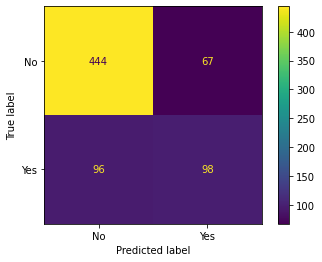

In [42]:
predictions = tree.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree.classes_)
disp.plot()
plt.show()

In [43]:
scores(tree, X_train, y_train, X_test, y_test, train=True, cv=5)
scores(tree, X_train, y_train, X_test, y_test, train=False, cv=5)

***************************** Training ************
Accuracy:		 0.8652571789207952
Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.93      0.91      4663
         Yes       0.78      0.68      0.73      1675

    accuracy                           0.87      6338
   macro avg       0.84      0.81      0.82      6338
weighted avg       0.86      0.87      0.86      6338

Confusion Matrix:
 [[4337  326]
 [ 528 1147]]
******Cross Validation Number: 5
Avg accuracy: 0.7628591844915459
Accuracy standard dev: 0.00798745235605398


***************************** Testing *************
Accuracy:		 0.7687943262411348
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.87      0.84       511
         Yes       0.59      0.51      0.55       194

    accuracy                           0.77       705
   macro avg       0.71      0.69      0.70       705
weighted avg       0.76      0

Above, recall is pretty bad for positive churn, whereas No churn got good results: 87

## Feature importance for Decision Tree Class

In [44]:
feature_imp = pd.DataFrame(data=tree.feature_importances_, 
                index=X.columns, columns=['Features Impr']).sort_values(by='Features Impr', ascending=False)

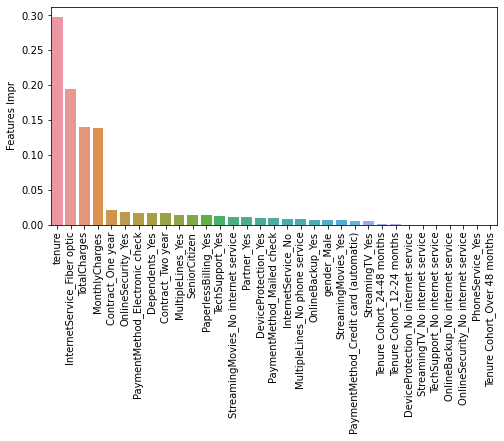

In [45]:
plt.figure(figsize=(8,4))
sns.barplot(data=feature_imp, x=feature_imp.index, y='Features Impr');
plt.xticks(rotation=90);

## Random Forest

In [46]:
rf = RandomForestClassifier(max_depth=6)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [47]:
predictions_rf = rf.predict(X_test)

In [48]:
scores(rf, X_train, y_train, X_test, y_test, train=True, cv=5)
scores(rf, X_train, y_train, X_test, y_test, train=False, cv=5)

***************************** Training ************
Accuracy:		 0.8065635847270433
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.93      0.88      4663
         Yes       0.70      0.47      0.56      1675

    accuracy                           0.81      6338
   macro avg       0.76      0.70      0.72      6338
weighted avg       0.80      0.81      0.79      6338

Confusion Matrix:
 [[4327  336]
 [ 890  785]]
******Cross Validation Number: 5
Avg accuracy: 0.7964644867654784
Accuracy standard dev: 0.01028481882646789


***************************** Testing *************
Accuracy:		 0.8127659574468085
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.93      0.88       511
         Yes       0.73      0.50      0.60       194

    accuracy                           0.81       705
   macro avg       0.78      0.72      0.74       705
weighted avg       0.80      0

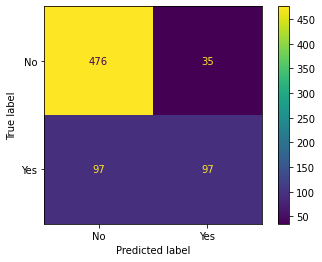

In [49]:
predictions_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, predictions_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [50]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)

In [51]:
scores(ada, X_train, y_train, X_test, y_test, train=True, cv=5)
scores(ada, X_train, y_train, X_test, y_test, train=False, cv=5)

***************************** Training ************
Accuracy:		 0.8097191543073525
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.90      0.87      4663
         Yes       0.67      0.55      0.60      1675

    accuracy                           0.81      6338
   macro avg       0.76      0.72      0.74      6338
weighted avg       0.80      0.81      0.80      6338

Confusion Matrix:
 [[4219  444]
 [ 762  913]]
******Cross Validation Number: 5
Avg accuracy: 0.8002503491941768
Accuracy standard dev: 0.00912723620104716


***************************** Testing *************
Accuracy:		 0.8141843971631205
Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.91      0.88       511
         Yes       0.71      0.56      0.62       194

    accuracy                           0.81       705
   macro avg       0.78      0.73      0.75       705
weighted avg       0.81      0

In [52]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

In [53]:
scores(gb, X_train, y_train, X_test, y_test, train=True, cv=5)
scores(gb, X_train, y_train, X_test, y_test, train=False, cv=5)

***************************** Training ************
Accuracy:		 0.8254970022088987
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.92      0.89      4663
         Yes       0.72      0.56      0.63      1675

    accuracy                           0.83      6338
   macro avg       0.79      0.74      0.76      6338
weighted avg       0.82      0.83      0.82      6338

Confusion Matrix:
 [[4299  364]
 [ 742  933]]
******Cross Validation Number: 5
Avg accuracy: 0.7975692101613638
Accuracy standard dev: 0.006134175010800224


***************************** Testing *************
Accuracy:		 0.8198581560283688
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.92      0.88       511
         Yes       0.72      0.56      0.63       194

    accuracy                           0.82       705
   macro avg       0.79      0.74      0.76       705
weighted avg       0.81      

In [54]:
params_grid = {
        'depth':[1,5,10],
          'iterations':[100,250,500],
          'learning_rate':[0.01,0.2,0.3], 
          'l2_leaf_reg':[1,10,100],
          'border_count':[5,50,200],
          'thread_count':[4],
          }


cat_model = CatBoostClassifier()

In [55]:
grid_catmodel = GridSearchCV(estimator=cat_model, 
                                param_grid=params_grid,
                                cv=2,
                                verbose=1) # 11:50

In [57]:
# grid_catmodel.fit(X_train, y_train) # took 40 mins in my computer

In [ ]:
grid_catmodel.best_params_

In [ ]:
# best params for results above

params = {'border_count': 5,
 'depth': 1,
 'iterations': 250,
 'l2_leaf_reg': 1,
 'learning_rate': 0.2,
 'thread_count': 4,
 'verbose': False}

cat_model = CatBoostClassifier(**params)

cat_model.fit(X_train, y_train)

In [ ]:
y_pred = cat_model.predict(X_test)

In [ ]:
scores(cat_model, X_train, y_train, X_test, y_test, train=True, cv=5)
scores(cat_model, X_train, y_train, X_test, y_test, train=False, cv=5)

***************************** Training ************
Accuracy:		 0.8056169138529504
Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.91      0.87      4663
         Yes       0.67      0.51      0.58      1675

    accuracy                           0.81      6338
   macro avg       0.76      0.71      0.73      6338
weighted avg       0.80      0.81      0.80      6338

Confusion Matrix:
 [[4245  418]
 [ 814  861]]
******Cross Validation Number: 5
Avg accuracy: 0.8024599204758502
Accuracy standard dev: 0.006855076830377267


***************************** Testing *************
Accuracy:		 0.8198581560283688
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.91      0.88       511
         Yes       0.71      0.58      0.64       194

    accuracy                           0.82       705
   macro avg       0.78      0.74      0.76       705
weighted avg       0.81      

Comparing Adaboost with Catboost, for now Catboost is the leader with 0.58 for recall in + churn, precision 72 and 82 accuracy. Save the model for prediction.

### Save model

In [58]:
params = {'border_count': 5,
 'depth': 1,
 'iterations': 250,
 'l2_leaf_reg': 1,
 'learning_rate': 0.2,
 'thread_count': 4,
 'verbose': False}

final_cat_model = CatBoostClassifier(**params)

final_cat_model.fit(X, y)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [59]:
joblib.dump(final_cat_model, 'cat_boost.pkl')

['cat_boost.pkl']

In [60]:
joblib.dump(list(X.columns), 'cat_boost_names.pkl')

['cat_boost_names.pkl']

In [61]:
new_cols = joblib.load('cat_boost_names.pkl')
print(new_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Tenure Cohort_12-24 months', 'Tenure Cohort_24-48 months', 'Tenure Cohort_Over 48 months']


In [62]:
load_model = joblib.load('cat_boost.pkl')

In [84]:
testing = X.iloc[185,:]
print(len(testing.values))
print(len(X.columns))

33
33


In [78]:
load_model.predict(testing.values)

'No'

In [88]:
# check in df:
len(testing), len(df.columns)

(33, 22)

In [89]:
testing

SeniorCitizen                             0.0
tenure                                    1.0
MonthlyCharges                           24.8
TotalCharges                             24.8
gender_Male                               0.0
Partner_Yes                               1.0
Dependents_Yes                            0.0
PhoneService_Yes                          0.0
MultipleLines_No phone service            1.0
MultipleLines_Yes                         0.0
InternetService_Fiber optic               0.0
InternetService_No                        0.0
OnlineSecurity_No internet service        0.0
OnlineSecurity_Yes                        0.0
OnlineBackup_No internet service          0.0
OnlineBackup_Yes                          0.0
DeviceProtection_No internet service      0.0
DeviceProtection_Yes                      0.0
TechSupport_No internet service           0.0
TechSupport_Yes                           0.0
StreamingTV_No internet service           0.0
StreamingTV_Yes                   

In [ ]:
# utility to plot confusion matrix
def confusion(cl, X_train, y_train, X_test, y_test):
    prediction = cl.predict(X_test)
    confusion_matrix()
    ConfusionMatrixDisplay()

In [ ]:
scores(tree, X_train, y_train, X_test, y_test, train=True, cv=5)
scores(tree, X_train, y_train, X_test, y_test, train=False, cv=5)

***************************** Training ************
Accuracy:		 0.8649416219627643
Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.93      0.91      4663
         Yes       0.78      0.68      0.73      1675

    accuracy                           0.86      6338
   macro avg       0.84      0.81      0.82      6338
weighted avg       0.86      0.86      0.86      6338

Confusion Matrix:
 [[4340  323]
 [ 533 1142]]
******Cross Validation Number: 5
Avg accuracy: 0.7625432291186861
Accuracy standard dev: 0.009615035833074926


***************************** Testing *************
Accuracy:		 0.7673758865248227
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.87      0.84       511
         Yes       0.59      0.49      0.54       194

    accuracy                           0.77       705
   macro avg       0.71      0.68      0.69       705
weighted avg       0.76      